## *Missing Values*

Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### *1. Missing Completely at Random, MCAR:*

Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### *2. Missing at Random MAR:*

Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## *3. Missing data not at random (MNAR):* 

It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Check missing values
df.isnull()

# missing values are shown as 'True'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Number of missing values by category
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# *Imputation Missing Values*

1. Mean Value Imputation - Missing values will be replaced by the mean

Mean Imputation works well when we have normally distributed data

<Axes: xlabel='age', ylabel='Count'>

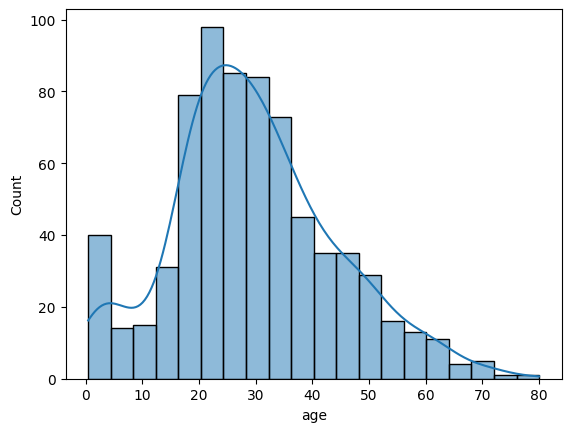

In [8]:
sns.histplot(df['age'],kde=True)

In [17]:
# Missing values/ NAN values are replaced by mean
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [18]:
# show
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


*2. Median Value Imputation - missing values will be replaced by median* 

If we have outliers in the dataset

In [19]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [20]:
df[['age','age_mean','age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


*3. Mode Value Imputation - missing values will be replaced by mode*

Categorical values

In [ ]:
# 'embarked' categorical column has 2 missing values
df['embarked'].isnull().sum()

2

In [ ]:
# show
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new age,age_median,age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [26]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# mode value calculation

In [33]:
# input without missing values
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [34]:
# number of elements without missing values
df['embarked'].notna().sum()

889

In [ ]:
df.shape # 891-889 = 2 missing values

(891, 18)

In [40]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [41]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [44]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [46]:
# Now all missing values are replaced
df['embarked_mode'].isnull().sum()

0

# Handling Imbalanced Dataset

*1. Up Sampling*

- **Up sampling is a technique used to balance the dataset by creating new instances of the minority class.**

*2. Down Sampling*

- **Down sampling is a technique used to balance the dataset by removing instances of the majority class.**

In [7]:
import pandas as pd
import numpy as np

# set the random seed for reproductibility
np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [8]:
n_class_0,n_class_1

(900, 100)

*DataFrame is not dictionary but it follows dictionary like behaviour. A DataFrame maintains a tabular (2D) structure with rows and columns, unlike a dictionary, which is a key-value mapping..*

In [9]:
# Create dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target' : [1] * n_class_1
})

In [10]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [7]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [12]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

*Up Sampling*

In [11]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [1]:
%pip install scikit-learn
%pip install numpy==1.21.2


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build numpy


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\python.exe' 'c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\ANKANB~1\AppData\Local\Temp\tmpb1j3w2ew'
       cwd: C:\Users\Ankan Basak\AppData\Local\Temp\pip-install-9cq1_9_g\numpy_ecbfa2d23cd04607895e15a0ffa115be
  Complete output (233 lines):
  setup.py:63: RuntimeWarning: NumPy 1.21.2 may not yet support Python 3.10.
    warnings.warn(
  Running from numpy source directory.
  Cythonizing sources
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  C:\Users\Ankan Basak\AppData\Local\Temp\pip-install-9cq1_9_g\numpy_ecbfa2d23cd04607895e15a0ffa115be\tools\cythonize.py:69: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  

In [12]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True,
        n_samples=len(df_majority), 
        random_state=45)

In [ ]:
df_minority_upsampled.shape # created more datapoints in minority class

(900, 3)

In [15]:
# combine

df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [16]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

*Down Sampling*

In [17]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [20]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [22]:
df_majority = df[df['target']==0]
df_minority = df[df['target']==1]

In [ ]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, # false beacuse we are not replacing, we deleting the maximum data
                                   n_samples=len(df_minority), random_state=45)

In [25]:
df_majority_downsampled.shape

(100, 3)

In [29]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [30]:
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

*down sampling is not a good option beacuse we loose data while performing this operation.* 

# SMOTE (Synthetic Minority Oversampling Technique)

*SMOTE is a technique used in ML to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances*

In [3]:
from sklearn.datasets import make_classification

In [5]:
x,y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1,
                    weights=[0.90], random_state=12 )

In [6]:
import pandas as pd

df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)

In [7]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

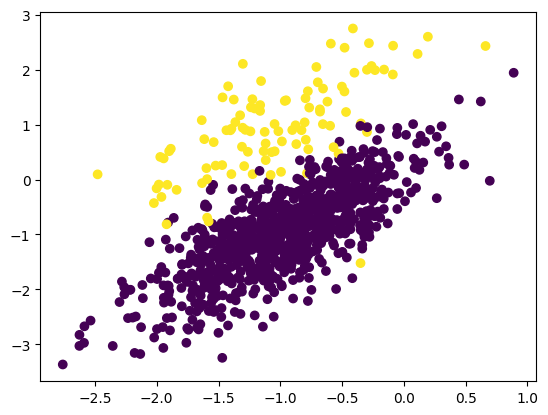

In [12]:
import matplotlib.pyplot as plt 

plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [13]:
%pip install imblearn

You should consider upgrading via the 'c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
# transform the dataset

oversample = SMOTE()

x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [16]:
x.shape

(1800, 2)

In [17]:
y.shape

(1800,)

In [19]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [20]:
y[y==1]

3       1
19      1
26      1
34      1
39      1
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 900, dtype: int64

In [21]:
# now create new dataframes to see the changes

df1_oversampled = pd.DataFrame(x,columns=['f1','f2'])
df2_oversampled = pd.DataFrame(y,columns=['target'])

df_oversampled = pd.concat([df1_oversampled,df2_oversampled],axis=1)

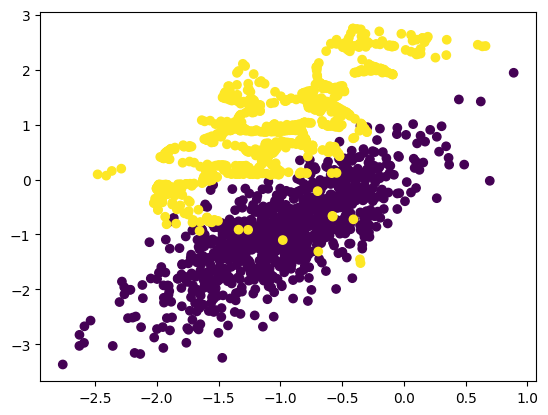

In [22]:
plt.scatter(df_oversampled['f1'],df_oversampled['f2'],c=df_oversampled['target'])

got connected the dots between minority class dataset 

# 5 Number Summary and Box Plot

In [ ]:
## Minimum, Maximum, Median, Q1, Q3, IQR

In [1]:
import numpy as np

In [35]:
marks = [1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,27]
min, Q1, median, Q3, max = np.quantile(marks,[0,0.25,0.5,0.75,1.0])

In [36]:
min, Q1, median, Q3, max

(np.float64(1.0),
 np.float64(3.0),
 np.float64(5.0),
 np.float64(6.5),
 np.float64(27.0))

In [10]:
IQR = Q3 - Q1

In [11]:
IQR

np.float64(3.0)

In [23]:
lower_fence = Q1 - 1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)

In [25]:
lower_fence, higher_fence

(np.float64(-1.5), np.float64(11.0))

<Axes: >

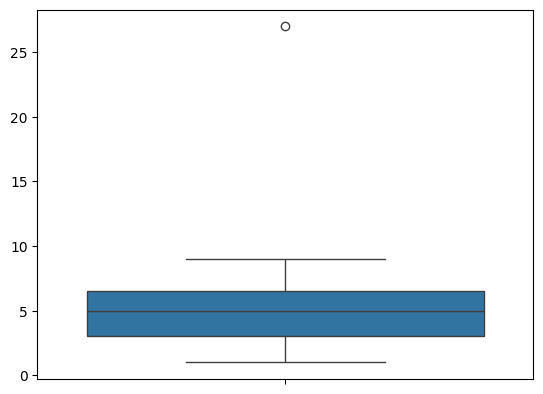

In [26]:
import seaborn as sns

sns.boxplot(marks)

In [ ]:
# outlier = 27 as mentioned in dot in the plot

In [ ]:
# removing outliers
new_marks = [mark for mark in marks if mark>-1.5 and mark<11]

In [33]:
new_marks

[1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 7, 8, 8, 9]

<Axes: >

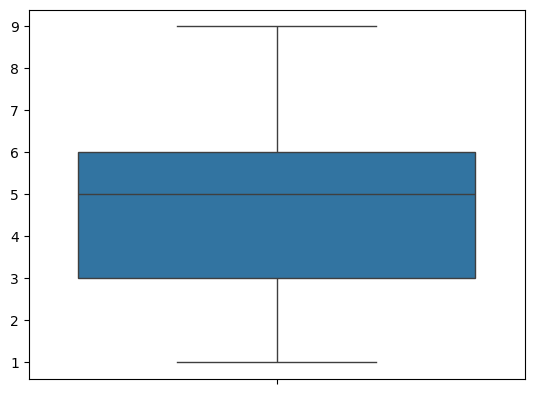

In [34]:
sns.boxplot(new_marks)

# Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding

*Nominal/OHE(One Hot Encoding)*

- One Hot Encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for ML algorithms. 

- In this technique, each category is represented as a binary vector where each bit corresponds to a unique category.

For example, if we have a categorical variable 'color' with three possible values (red,green,blue), we can represent it using one hot encoding as follows : 

1. Red: [1,0,0]
2. Green: [0,1,0]
3. Blue: [0,0,1]



In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [38]:
# create a simple dataframe

df = pd.DataFrame({
    'color' : ['red','blue','green','green','red','blue']
})

In [39]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [41]:
# create an instance of OHEncoder
encoder = OneHotEncoder()

In [44]:
# perform fit and transform

encoded = encoder.fit_transform(df[['color']]).toarray()

In [49]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [50]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [51]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [52]:
# Practice

sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
import pandas as pd

df = pd.DataFrame({
    'day' : ['Sun', 'Mon', 'Tue', 'Wed', 'Thus', 'Fri', 'Sat']
})

In [3]:
df

,day
0,Sun
1,Mon
2,Tue
3,Wed
4,Thus
5,Fri
6,Sat


In [4]:
from sklearn.preprocessing import OneHotEncoder

# create the instances
encoder = OneHotEncoder()

In [5]:
# fit and transform

encoder.fit_transform(df[['day']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (7, 7)>

In [6]:
encoder.fit_transform(df[['day']]).toarray()

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [7]:
encoded = encoder.fit_transform(df[['day']]).toarray()

In [9]:
pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

,day_Fri,day_Mon,day_Sat,day_Sun,day_Thus,day_Tue,day_Wed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [11]:
pd.concat([df,df_encoded],axis=1)

,day,day_Fri,day_Mon,day_Sat,day_Sun,day_Thus,day_Tue,day_Wed
0,Sun,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Mon,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Tue,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Wed,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Thus,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Fri,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sat,0.0,0.0,1.0,0.0,0.0,0.0,0.0


*Label Encoding*

- Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

- Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories.

For example, if we have a categorical variable 'color' with three possible values (red, green, blue), we can represent it using label encoding as follows : 

1. Red : 1
2. Green : 2
3. Blue : 3

In [15]:
df = pd.DataFrame({
    'color' : ['red','blue','green', 'green','red']
})

In [16]:
df

,color
0,red
1,blue
2,green
3,green
4,red


In [17]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [20]:
label.fit_transform(df[['color']])

c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2])

In [23]:
encoded = label.fit_transform(df[['color']])

c:\Users\Ankan Basak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
df_label = pd.DataFrame(encoded)

In [25]:
df_label

,0
0,2
1,0
2,1
3,1
4,2


In [26]:
pd.concat([df,df_label],axis=1)

,color,0
0,red,2
1,blue,0
2,green,1
3,green,1
4,red,2


*Ordinal Encoding*

- It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order.

For example, if we have a categorical variable 'educational level' with four possible values (high school,college,graduate,post-graduate), we can represent it using ordinal encoding as follows :

1. High school : 1
2. College : 2
3. Graduate : 3
4. Post-graduate : 4

In [28]:
import pandas as pd

df = pd.DataFrame({
    'size' : ['small','medium', 'large', 'medium', 'small', 'large']
})

In [29]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[['small','medium','large']])

In [40]:
ordinal.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [41]:
encoded = ordinal.fit_transform(df[['size']])

In [42]:
df_ordinal = pd.DataFrame(encoded)

In [45]:
pd.concat([df,df_ordinal],axis=1)

,size,0
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


*Target Guided Ordinal Encoding*

- It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

- In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [46]:
import pandas as pd

df = pd.DataFrame({
    'city' : ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price' : [200,150,300,250,180,320]
})

In [47]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [53]:
df.groupby('city')['price'].mean()

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [57]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [58]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [59]:
df['city_encoded'] = df['city'].map(mean_price)

In [60]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [61]:
# now we don't need the 'city' column to train our model

df[['price','city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [63]:
# Practice
import seaborn as sns
df = sns.load_dataset('tips')

In [64]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [66]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [67]:
# Consider the 'time' as the categorical variable 
# and 'total_bill' as the target variable

In [72]:
mean_time = df.groupby('time')['total_bill'].mean().to_dict()

C:\Users\Ankan Basak\AppData\Local\Temp\ipykernel_7220\137849218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time = df.groupby('time')['total_bill'].mean().to_dict()


In [73]:
mean_time

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [74]:
df['time_encoded'] = df['time'].map(mean_time)

In [78]:
df[['time','total_bill','time_encoded']]

,time,total_bill,time_encoded
0,Dinner,16.99,20.797159
1,Dinner,10.34,20.797159
2,Dinner,21.01,20.797159
3,Dinner,23.68,20.797159
4,Dinner,24.59,20.797159
...,...,...,...
239,Dinner,29.03,20.797159
240,Dinner,27.18,20.797159
241,Dinner,22.67,20.797159
242,Dinner,17.82,20.797159


In [79]:
df

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159
